<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 4</h1>

In questo notebook sono riportati gli esercizi per la cui soluzione è necessario il codice **md.3**: i grafici qui presenti sono in python, ma nella cartella è possibile trovarne di analoghi fatti con gnuplot. Sono anche riportati i comandi per creare i plot, salvati in dei file '.gnuplot'. 

Per eseguire il notebook sui computer di laboratorio, è necessario lanciare il seguente comando e selezionare il kernel python di conda.

<center>

`module load python3/anaconda`
<center>

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from scipy.stats import norm
from scipy.optimize import curve_fit

<center>

## Simulazioni in fluidi

Solitamente gli esperimenti non avvengono in condizioni di ultra-alto vuoto, e quindi i campioni di nostro interesse sono solitamente immersi in dei fluidi. Se il sistema costituito da campione e fluido è contenuto in un box isolante, l'energia totale si conserva, ma non lo saranno quelle relative ai singoli costituenti. La condizione di equilibrio fra fluido e molecola viene raggiunta nel momento in cui si ha

$$
T_m \,=\, T_f,
$$

ossia la molecola ed il fluido si trovano alla stessa temperatura. Una possibile modellizzazione del fluido consiste nel vederlo costituito da particelle puntiformi che interagiscono fra loro per mezzo di un potenziale a due corpi puramente repulsivo come

$$
U\left(\vec{r_i}, \vec{r_j}\right)\,=\,\frac{c}{\left|\vec{r_i}\,-\,\vec{r_j}\right|^{10}}, 
$$

dove $c$ determina l'intensità dell'interazione. Nella casistica da noi analizzata 

$$
c\,=\,10^{-2} \text{meV}.
$$

<center>

## Condizioni al contorno

Dato che il potenziale fra i costituenti del fluido è repulsio, in assenza di un box contenitivo le particelle dello stesso tenderebbero ad allontanarsi. 

Un modo sempice per simulare la presenza di un contenitore è l'applicazione di una forza di richiamo elastica ad ogni atomo che si trovi al di fuori della regione consentita. In questo caso è necessario prestare particolare attenzione agli effetti che si possono avere nel momento in cui il campione d'interesse giunge ai bordi della box: il potenziale armonico può causare deformazioni non trascurabili alla struttura.

Un secondo modo per confinare gli atomi in una certa regione è l'applicazione delle periodic boundary conditions. In un caso di questo genere, se un atomo esce dalla regione simulata da un lato, vi rientra dall'altro.

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 2.1</h1>

Per determinare quale sia il raggio efficace a temperatura ambiente, dobbiamo eguagliare il potenziale repulsivo all'energia termica, utilizzando come temperatura trecento kelvin. Abbiamo quindi che:

$$
\frac{c}{r^{10}}\,=\,k_B T
$$

Risolvendo per la distanza r, otteniamo che 

$$
r\,=\,\left(\frac{c}{k_B T}\right)^{1/10}\,=\,0.46\,\AA
$$

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 2.2</h1>


<center>

### Simulazione con forza di richiamo elastica

![Simulazione con costante elastica](gif/k_5.gif)
</center>

<br>
<br>
<br>
<br>
<br>
<center>

### Simulazione con periodic boundary condition

![Simulazione con pbc](gif/pbc.gif)
</center>

Notiamo che le due condizioni al contorno sono differenti. L'applicazione di una forza di richiamo armonica comporta il ritorno delle particelle all'interno della regione simulata per mezzo di una deviazione della loro traiettoria, mentre nel caso delle PBC le particelle che escono da una faccia della regione simulata, rientrano nello stesso dominio dall'altro lato. 

Dato che l'unica quantità d'interesse nel calcolo delle forze è la distanza relativa fra gli atomi, per simulare correttamente un sistema con PBC basta applicarle correttamente al calcolo delle distanze,

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 2.3</h1>

L'esecuzione, nel momento in cui si aggiunge il fluido all'interno della regione simulata, risulta fortemente rallentata: per individuare il motivo di questo rallentamento, è possibile effettuare del profiling in modo da individuare cosa influenzi maggiormente le tempistiche computazionali. 

## Profiling

Per mezzo del profiling, è possibile individuare quali metodi vengano maggiormente chiamati o siano computazionalmente più dispendiosi. Nel caso del programma in analisi, il profiling ottenuto è il seguente:

<center>

![Profiling](Immagini/profiling.png)
</center>

La maggior parte dell'esecuzione è spesa per il calcolo delle forze, dato che per interazioni a due corpi si deve ripetere questa operazione un numero di volte pari a quello dei costituenti elevato al quadrato. 

## Cut-off 

L'introduzione di un cut-off consiste nel considerare come interagenti solamente le particelle che si trovano a una distanza relativa inferiore di un certo valore. La distanza di cut-off deve essere scelta con cautela per non introdurre errori sistematici nella simulazione. Nel nostro caso avevamo determinato un raggio efficace (si veda l'esercizio 2.1) di circa 

$$
d\,\simeq\,0.5\,\AA.
$$

Per la distanza di cut-off possiamo pensare di prendere il doppio di tale valore, ossia

$$
r_{cut}\,=\,2 \cdot d\,\simeq\,1\,\AA
$$

### Introduzione del cut-off

Per come funziona il cutoff, ci aspettiamo che piccola sia tale distanza di soglia, minori siano i conti da fare (e di conseguenza più rapida sia l'esecuzione del codice). Per verificare o meno questo comportamento, ho scritto uno script bash che consentisse di fare profiling sui seguenti valori di cutoff:

$$
d_0\,\in\,\left\{0.5,\,0.75,\,1,\,1.25,\,1.5,\,1.75,\,2\right\}
$$

<center>

#### Cutoff = 0.5

![Profiling](Immagini/r_cut/prof_0.5.png)
<br>
<br>

#### Cutoff = 0.75

![Profiling](Immagini/r_cut/prof_0.75.png)
<br>
<br>

#### Cutoff = 1

![Profiling](Immagini/r_cut/prof_1.png)
<br>
<br>

#### Cutoff = 1.25

![Profiling](Immagini/r_cut/prof_1.25.png)
<br>
<br>

#### Cutoff = 1.5

![Profiling](Immagini/r_cut/prof_1.5.png)
<br>
<br>

#### Cutoff = 1.75

![Profiling](Immagini/r_cut/prof_1.75.png)
<br>
<br>

#### Cutoff = 2

![Profiling](Immagini/r_cut/prof_2.png)
<br>
<br>
</center>

E' possibile osservare come all'aumentare del cutoff, essendo considerate più particelle come interagenti, il numero maggiore di conti si traduce in tempistiche d'esecuzione maggiori.

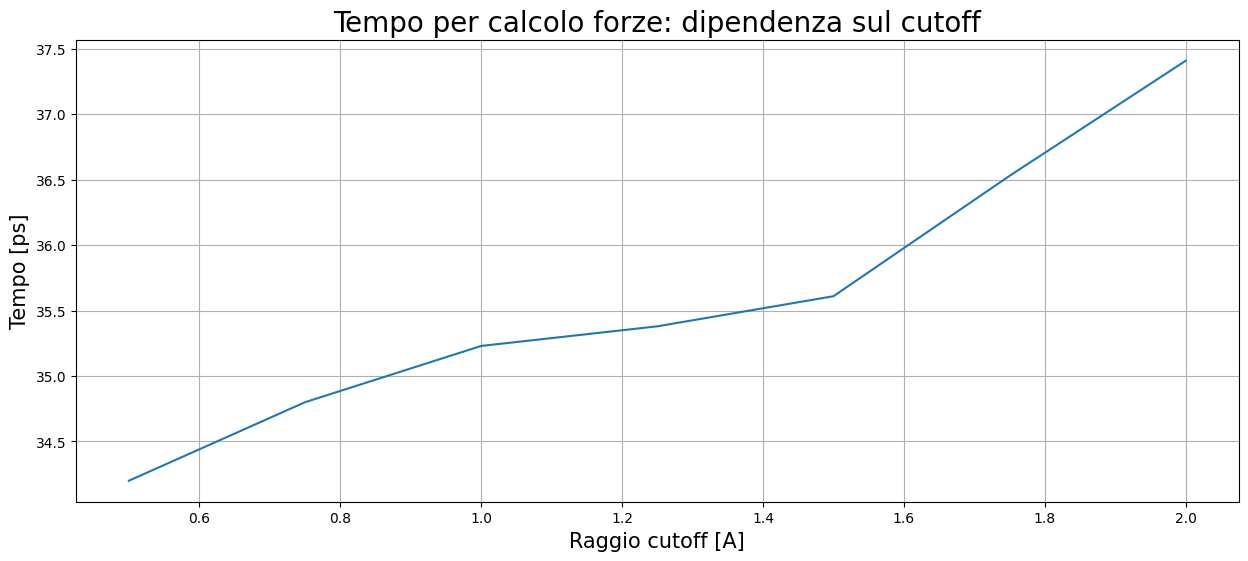

In [3]:
cut_r = np.array([0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0])
cut_t = np.array([34.2, 34.8, 35.23, 35.38, 35.61, 36.53, 37.41])


fig = plt.figure(figsize=(15, 6))

plt.plot(cut_r, cut_t)

plt.xlabel(r"Raggio cutoff [A]", fontsize = 15)
plt.ylabel(r"Tempo [ps]", fontsize = 15)
plt.title(r"Tempo per calcolo forze: dipendenza sul cutoff", fontsize = 20)
plt.grid(True)

plt.show()

### Shift del potenziale

Introdurre un cutoff su un potenziale comporta dei salti in energia potenziale per quelle particelle che passano dalla regione non interagente a quella interagente o vice-versa. Nel caso del nostro potenziale, il valore che esso assume alla distanza di cutoff $d$ è pari a 

$$
U\left(d\right)\,=\,\frac{c}{d^{10}}.
$$

Per migliorare le proprietà di conservazione dell'energia totale è possibile introdurre uno shift nel potenziale in modo tale che al cutoff esso assuma valore nullo e quindi risulti essere continuo alla distanza di cutoff. Questa correzione da luogo ad un nuovo potenziale

$$
U'\left(\vec{r_i}, \vec{r_j}\right)\,=\,\frac{c}{\left|\vec{r_i}\,-\,\vec{r_j}\right|^{10}}\,-\,\frac{c}{d^{10}}
$$

In seguito confronto l'energia totale per il sistema con e senza shift sul potenziale, per verificare in quale dei due casi la conservazione sia migliore.

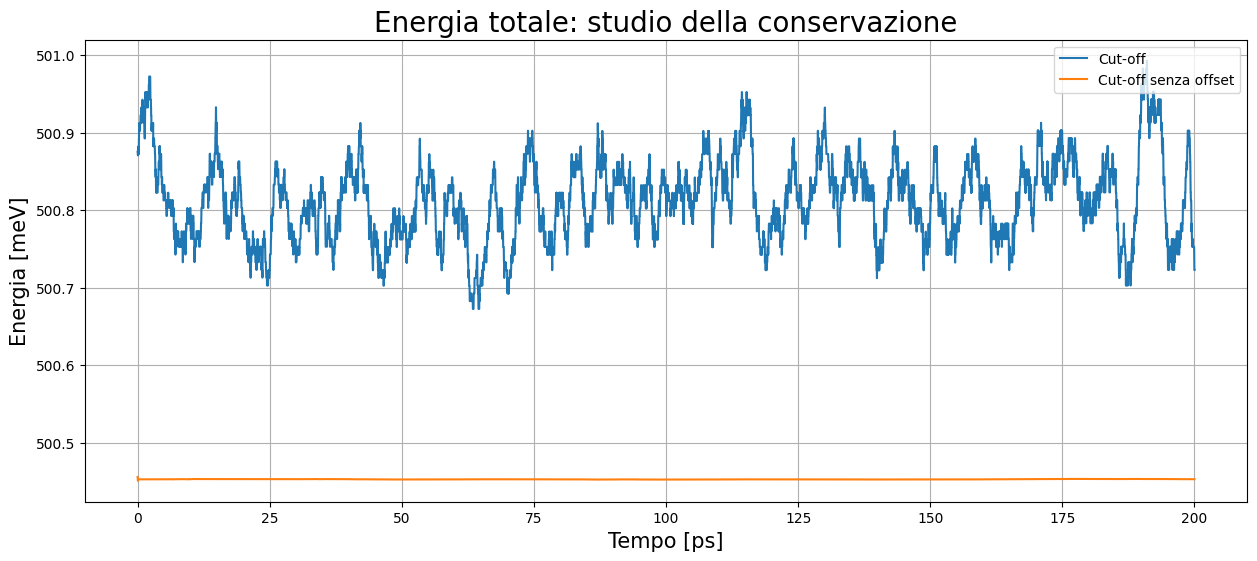

In [8]:
fig = plt.figure(figsize=(15, 6))
no_off = np.loadtxt('consShift/rcut_1_noOff.out')
si_off = np.loadtxt('consShift/rcut_1_siOff.out')


plt.plot(si_off[:,0], si_off[:,3], label = r'Cut-off')
plt.plot(no_off[:,0], no_off[:,3], label = r'Cut-off senza offset')

plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.ylabel(r"Energia [meV]", fontsize = 15)
plt.title(r"Energia totale: studio della conservazione", fontsize = 20)
plt.legend(loc = 'upper right')
plt.grid(True)

plt.show()

Notiamo come, quando il potenziale è posto a zero alla distanza di cutoff, l'energia totale sia conservata con maggior accuratezza. Il motivo di un valore più basso ottenuto in questo caso è che lo shift è fatto su tutto il potenziale (e quindi la correzione si somma sui vari costituenti).

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 2.4</h1>

Un altro modo per rendere più efficiente il calcolo delle forze è lavorare con le liste dei primi vicini. Per ogni atomo, è necessario individuare la lista di tutti quei costituenti del sistema che si trovano più vicini di una certa distanza limite $d_0$, che è leggermente maggiore del raggio di cutoff precedentemente individuato in modo tale che

$$
d_0\,=\,r_{cut}\,+\,d_{skin}
$$

Le forze sono calcolate in base a queste liste, che vanno aggiornate ogni certo numero di step poichè durante la simulazione gli atomi si muovono. Questo passaggio è necessario solamente ogni $n$ step, ossia quel numero di iterazioni tale per cui 

$$
n \Delta t \simeq \frac{d_{skin}}{v_{max}},
$$

dove $\Delta t$ è il time step simulativo ed invece $v_{max}$ è la maggior velocità presente nel sistema. Il miglioramento per quanto riguarda le tempistiche d'esecuzione è evidente, come evidente nei profiling seguenti.

<center>

#### Senza lista dei vicini

![Profiling](Immagini/prof_no_lista.png)

<br>
<br>

#### Con lista dei vicini

![Profiling](Immagini/prof_si_lista.png)

</center>



A parità di input, il tempo d'esecuzione si riduce di un fattore 16, il tutto grazie al minor numero di check che si devono fare per calcolare le forze. In seguito riporto un confronto fra la temperatura dell'acqua ottenuta in un caso con la lista dei primi vicini e nell'altro usando il cutoff canonico. Notiamo che l'andamento è confrontabile, ma non esattamente sovrapposto: ci aspettiamo un comportamento di questo genere, dato che la lista dei primi vicini viene aggiornata ogni 100 iterazioni ed alcuni elementi possono uscire dalla skin durante tale evoluzione del sistema.

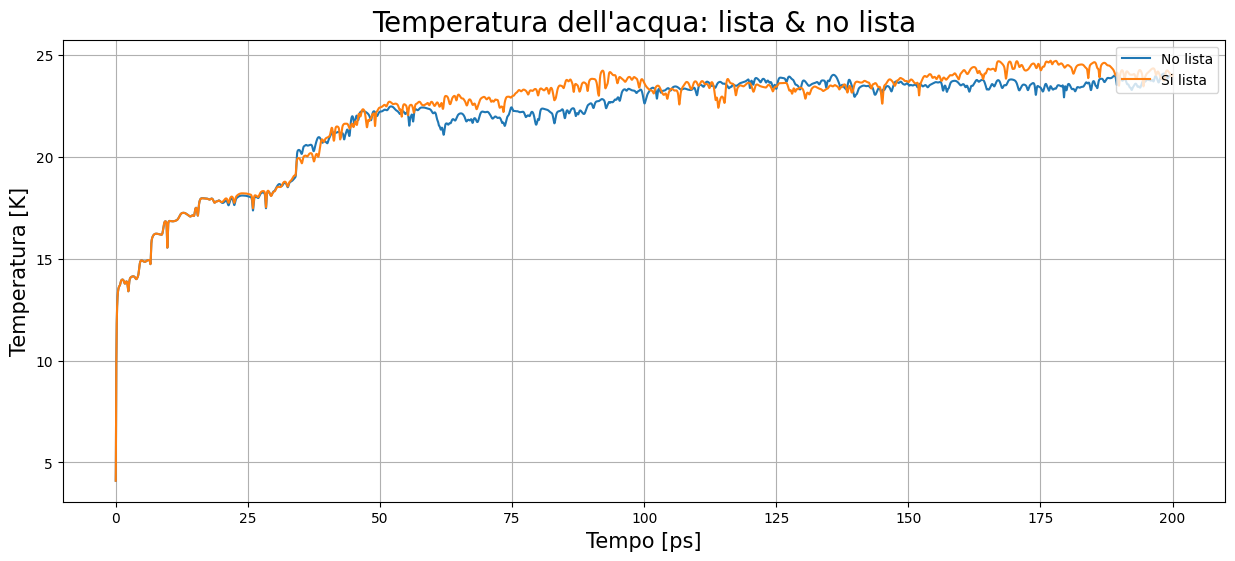

In [6]:
fig = plt.figure(figsize=(15, 6))
no_list = np.loadtxt('neigh_list/no_lista.out')
si_list = np.loadtxt('neigh_list/si_lista.out')


plt.plot(si_list[:,0], si_list[:,6], label = r'No lista')
plt.plot(no_list[:,0], no_list[:,6], label = r'Si lista')

plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.ylabel(r"Temperatura [K]", fontsize = 15)
plt.title(r"Temperatura dell'acqua: lista & no lista", fontsize = 20)
plt.legend(loc = 'upper right')
plt.grid(True)

plt.show()

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 2.5</h1>

Nella parte di cenni teorici, era stato sottolineato come l'equilibrio del sistema potesse essere esplicitato come

$$
T_m\,=\,T_w,
$$

ossia come equilibrio termico fra la molecola ed il fluido nella quale essa si trova immersa. Per valutare tali quantità si deve applicare l'equipartizione separatamente all'energia cinetica dei due sotto-sistemi, ossia

$$
T_m\,=\,\frac{2}{3N_m}K_{m},
$$

$$
T_w\,=\,\frac{2}{3N_w}K_{w},
$$

dove con K si intende l'energia cinetica. Andiamo ora a simulare l'evoluzione del sistema per 200 ps e studiamo quale sia l'andamento della temperatura.

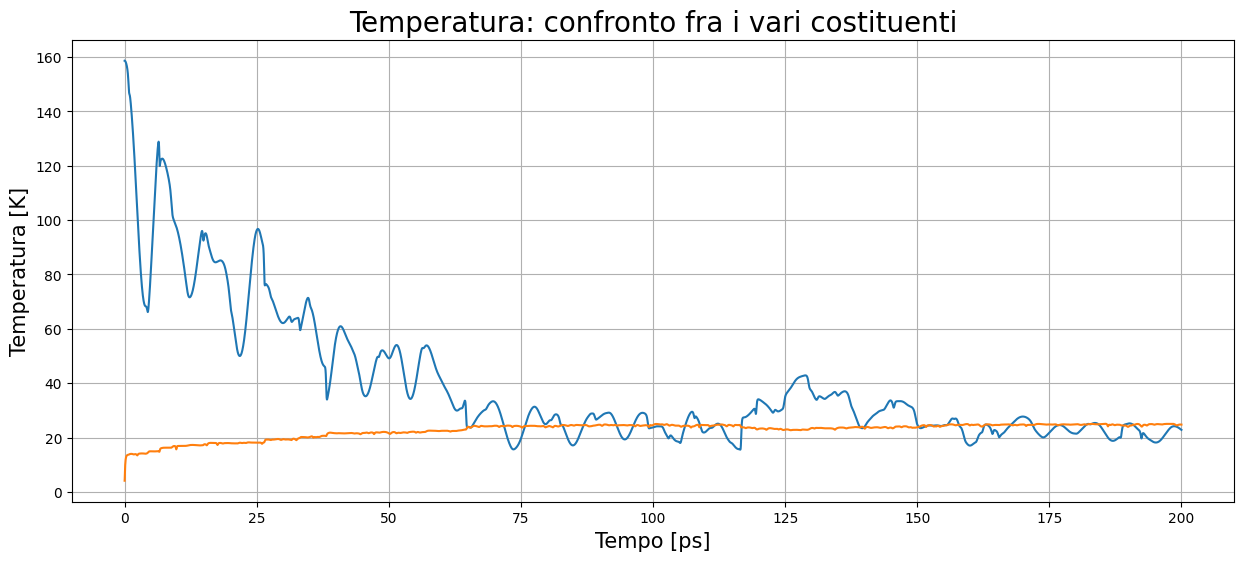

In [9]:
fig = plt.figure(figsize=(15, 6))
c_temp = np.loadtxt('confT/confTemp.dat')


plt.plot(c_temp[:,0], c_temp[:,5], label = r'$T_{mol}$')
plt.plot(c_temp[:,0], c_temp[:,6], label = r'$T_{w}$')

plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.ylabel(r"Temperatura [K]", fontsize = 15)
plt.title(r"Temperatura: confronto fra i vari costituenti", fontsize = 20)
plt.grid(True)

plt.show()

Notiamo che, mentre la temperatura dell'acqua cresce lentamente ed in modo uniforme, quella della molecola è soggetta a fluttuazioni più marcate. Questo è dovuto al fatto che la molecola che stiamo prendendo in considerazione è di dimensioni contenute, in quanto è costituita da solo 12 masse. Notiamo che dopo una fase di transiente iniziale, le due temperature oscillano attorno ad un valore di circa 25 Kelvin.

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 2.6</h1>

Le nuove condizioni iniziali sono riportate nel file 

<center>

`initialchain.w.xyz.corr`
</center>

dove tutte le velocità delle particelle sono poste a zero, tranne la componente x dell'ultima. Tale velocità corrisponde ad una temperatura superiore ai 300 K nel sistema di unità di misura con cui stiamo lavorando. La dinamica che si instaura è la seguente

<center>

![Una veloce](./one_fast/one_fast.gif)
</center>

dove la particella altamente energetica trasferisce parte della sua energia al resto del sistema giungendo infine all'equilibrio termico.